In [5]:
import pandas as pd
import hvplot.pandas
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from scipy import stats


In [6]:
df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
df.columns

FileNotFoundError: [Errno 2] No such file or directory: 'Crime_Data_from_2020_to_Present.csv'

In [ ]:
df.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,8.343200e+05,834320.000000,834320.000000,834320.000000,834320.000000,834320.000000,834320.000000,834310.000000,290925.000000,834310.000000,61325.000000,2071.000000,61.000000,834320.000000,834320.000000
mean,2.163756e+08,1335.953179,10.708680,1117.292147,1.413470,500.844621,29.782026,305.839397,363.065742,500.582878,957.498997,983.795751,990.868852,33.981070,-118.032961
std,1.090810e+07,653.964917,6.094713,609.462937,0.492456,207.778540,21.782950,216.806584,123.716983,207.565871,111.393187,52.531254,27.690236,1.775627,6.156465
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-3.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.000000,0.000000,-118.667600
25%,2.102104e+08,900.000000,6.000000,615.000000,1.000000,331.000000,6.000000,101.000000,310.000000,331.000000,998.000000,998.000000,998.000000,34.013700,-118.429500
50%,2.201268e+08,1415.000000,11.000000,1141.000000,1.000000,442.000000,31.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.000000,34.058400,-118.321400
75%,2.220196e+08,1900.000000,16.000000,1615.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000,34.163000,-118.273900
max,2.399165e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.334300,0.000000


In [ ]:
df.shape

(834320, 28)

In [ ]:
df_uptaded = df.drop(['DR_NO','AREA','Crm Cd 1','Crm Cd', 'Part 1-2','Status',
       'Crm Cd 2', 'Crm Cd 3','Cross Street','Weapon Used Cd', 'Mocodes', 'Crm Cd 4','Rpt Dist No','Date Rptd','Status Desc','Premis Cd'], axis=1)
df_uptaded

,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,LOCATION,LAT,LON
0,01/08/2020 12:00:00 AM,2230,Southwest,BATTERY - SIMPLE ASSAULT,36,F,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",1100 W 39TH PL,34.0141,-118.2978
1,01/01/2020 12:00:00 AM,330,Central,BATTERY - SIMPLE ASSAULT,25,M,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,700 S HILL ST,34.0459,-118.2545
2,02/13/2020 12:00:00 AM,1200,Central,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,POLICE FACILITY,NaN,200 E 6TH ST,34.0448,-118.2474
3,01/01/2020 12:00:00 AM,1730,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,5400 CORTEEN PL,34.1685,-118.4019
4,01/01/2020 12:00:00 AM,415,Mission,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,BEAUTY SUPPLY STORE,NaN,14400 TITUS ST,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...
834315,01/26/2023 12:00:00 AM,1800,Foothill,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,M,H,"VEHICLE, PASSENGER/TRUCK",NaN,12500 BRANFORD ST,34.2466,-118.4054
834316,03/22/2023 12:00:00 AM,1000,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,H,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",12800 FILMORE ST,34.2790,-118.4116
834317,04/12/2023 12:00:00 AM,1630,77th Street,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,M,B,LAUNDROMAT,UNKNOWN WEAPON/OTHER WEAPON,6100 S VERMONT AV,33.9841,-118.2915
834318,07/01/2023 12:00:00 AM,1,Central,PICKPOCKET,24,F,H,NIGHT CLUB (OPEN EVENINGS ONLY),NaN,500 S MAIN ST,34.0467,-118.2485


In [ ]:
#Rename the columns
df_uptaded = df_uptaded.rename(columns={
    "DATE OCC": "Date of Crime",
    "DATE RPTD": "Date Reported",
    "TIME OCC": "Time of Crime",
    "AREA NAME": "Neighborhood",
    "Crm Cd Desc": "Type of Crime",
    "Vict Age": "Age",
    "Vict Sex": "Gender",
    "Vict Descent": "Ethnicity",
    "Premis Desc": "Location",
    "Weapon Desc": "Weapon Used",
    "LOCATION": "Address",
    "LAT": "Latitude",
    "LON": "Longitude"
})

In [ ]:
df_uptaded.loc[:, 'Ethnicity'] = df_uptaded['Ethnicity'].replace('H', 'Hispanic')
df_uptaded.loc[:, 'Ethnicity'] = df_uptaded['Ethnicity'].replace('B', 'Black')
df_uptaded.loc[:, 'Ethnicity'] = df_uptaded['Ethnicity'].replace('W', 'White')
df_uptaded.loc[:, 'Ethnicity'] = df_uptaded['Ethnicity'].replace('O', 'Others')
df_uptaded.loc[:, 'Ethnicity'] = df_uptaded['Ethnicity'].replace('A', 'Other Asian')

In [ ]:
df_nonan = df_uptaded[df_uptaded['Weapon Used'].notna()]
df_nonan

,Date of Crime,Time of Crime,Neighborhood,Type of Crime,Age,Gender,Ethnicity,Location,Weapon Used,Address,Latitude,Longitude
0,01/08/2020 12:00:00 AM,2230,Southwest,BATTERY - SIMPLE ASSAULT,36,F,Black,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",1100 W 39TH PL,34.0141,-118.2978
1,01/01/2020 12:00:00 AM,330,Central,BATTERY - SIMPLE ASSAULT,25,M,Hispanic,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,700 S HILL ST,34.0459,-118.2545
5,01/01/2020 12:00:00 AM,30,Central,"RAPE, FORCIBLE",25,F,Hispanic,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,700 S BROADWAY,34.0452,-118.2534
10,01/04/2020 12:00:00 AM,2200,Central,BURGLARY FROM VEHICLE,29,M,Other Asian,STREET,ROCK/THROWN OBJECT,15TH,34.0359,-118.2648
11,01/05/2020 12:00:00 AM,955,Central,CRIMINAL THREATS - NO WEAPON DISPLAYED,35,M,Others,PARKING LOT,VERBAL THREAT,800 N ALAMEDA ST,34.0615,-118.2412
...,...,...,...,...,...,...,...,...,...,...,...,...
834303,08/27/2023 12:00:00 AM,30,N Hollywood,BRANDISH WEAPON,38,M,Hispanic,STREET,KNIFE WITH BLADE 6INCHES OR LESS,11000 MCCORMICK ST,34.1660,-118.3705
834306,07/24/2023 12:00:00 AM,1400,Hollywood,ROBBERY,23,F,Black,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",5500 HOLLYWOOD BL,34.1038,-118.3151
834309,09/20/2023 12:00:00 AM,1915,Van Nuys,BATTERY - SIMPLE ASSAULT,44,M,Black,LIBRARY,UNKNOWN WEAPON/OTHER WEAPON,6200 SYLMAR AV,34.1837,-118.4465
834316,03/22/2023 12:00:00 AM,1000,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,Hispanic,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",12800 FILMORE ST,34.2790,-118.4116


In [ ]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [ ]:
df_nonan = df_uptaded[df_uptaded['Weapon Used'].notna()]
df_nonan

,Date of Crime,Time of Crime,Neighborhood,Type of Crime,Age,Gender,Ethnicity,Location,Weapon Used,Address,Latitude,Longitude
0,01/08/2020 12:00:00 AM,2230,Southwest,BATTERY - SIMPLE ASSAULT,36,F,Black,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",1100 W 39TH PL,34.0141,-118.2978
1,01/01/2020 12:00:00 AM,330,Central,BATTERY - SIMPLE ASSAULT,25,M,Hispanic,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,700 S HILL ST,34.0459,-118.2545
5,01/01/2020 12:00:00 AM,30,Central,"RAPE, FORCIBLE",25,F,Hispanic,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,700 S BROADWAY,34.0452,-118.2534
10,01/04/2020 12:00:00 AM,2200,Central,BURGLARY FROM VEHICLE,29,M,Other Asian,STREET,ROCK/THROWN OBJECT,15TH,34.0359,-118.2648
11,01/05/2020 12:00:00 AM,955,Central,CRIMINAL THREATS - NO WEAPON DISPLAYED,35,M,Others,PARKING LOT,VERBAL THREAT,800 N ALAMEDA ST,34.0615,-118.2412
...,...,...,...,...,...,...,...,...,...,...,...,...
834303,08/27/2023 12:00:00 AM,30,N Hollywood,BRANDISH WEAPON,38,M,Hispanic,STREET,KNIFE WITH BLADE 6INCHES OR LESS,11000 MCCORMICK ST,34.1660,-118.3705
834306,07/24/2023 12:00:00 AM,1400,Hollywood,ROBBERY,23,F,Black,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",5500 HOLLYWOOD BL,34.1038,-118.3151
834309,09/20/2023 12:00:00 AM,1915,Van Nuys,BATTERY - SIMPLE ASSAULT,44,M,Black,LIBRARY,UNKNOWN WEAPON/OTHER WEAPON,6200 SYLMAR AV,34.1837,-118.4465
834316,03/22/2023 12:00:00 AM,1000,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,Hispanic,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",12800 FILMORE ST,34.2790,-118.4116


In [ ]:
df_nonan['Date of Crime'] = pd.to_datetime(df_nonan['Date of Crime'], format='%m/%d/%Y %I:%M:%S %p')
df_nonan['Month'] = df_nonan['Date of Crime'].dt.strftime('%B')
last_column = df_nonan.pop('Month') 
df_nonan.insert(1, 'Month', last_column)
df_nonan

C:\Users\komis\AppData\Local\Temp\ipykernel_23820\419088731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonan['Date of Crime'] = pd.to_datetime(df_nonan['Date of Crime'], format='%m/%d/%Y %I:%M:%S %p')
C:\Users\komis\AppData\Local\Temp\ipykernel_23820\419088731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonan['Month'] = df_nonan['Date of Crime'].dt.strftime('%B')


,Date of Crime,Month,Time of Crime,Neighborhood,Type of Crime,Age,Gender,Ethnicity,Location,Weapon Used,Address,Latitude,Longitude
0,2020-01-08,January,2230,Southwest,BATTERY - SIMPLE ASSAULT,36,F,Black,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",1100 W 39TH PL,34.0141,-118.2978
1,2020-01-01,January,330,Central,BATTERY - SIMPLE ASSAULT,25,M,Hispanic,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,700 S HILL ST,34.0459,-118.2545
5,2020-01-01,January,30,Central,"RAPE, FORCIBLE",25,F,Hispanic,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,700 S BROADWAY,34.0452,-118.2534
10,2020-01-04,January,2200,Central,BURGLARY FROM VEHICLE,29,M,Other Asian,STREET,ROCK/THROWN OBJECT,15TH,34.0359,-118.2648
11,2020-01-05,January,955,Central,CRIMINAL THREATS - NO WEAPON DISPLAYED,35,M,Others,PARKING LOT,VERBAL THREAT,800 N ALAMEDA ST,34.0615,-118.2412
...,...,...,...,...,...,...,...,...,...,...,...,...,...
834303,2023-08-27,August,30,N Hollywood,BRANDISH WEAPON,38,M,Hispanic,STREET,KNIFE WITH BLADE 6INCHES OR LESS,11000 MCCORMICK ST,34.1660,-118.3705
834306,2023-07-24,July,1400,Hollywood,ROBBERY,23,F,Black,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",5500 HOLLYWOOD BL,34.1038,-118.3151
834309,2023-09-20,September,1915,Van Nuys,BATTERY - SIMPLE ASSAULT,44,M,Black,LIBRARY,UNKNOWN WEAPON/OTHER WEAPON,6200 SYLMAR AV,34.1837,-118.4465
834316,2023-03-22,March,1000,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,Hispanic,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",12800 FILMORE ST,34.2790,-118.4116


In [ ]:
from datetime import datetime


df_nonan['Time of Crime'] = pd.to_datetime(df_nonan['Time of Crime'], format='%H%M', errors='coerce').dt.time


df_nonan

C:\Users\komis\AppData\Local\Temp\ipykernel_23820\898085979.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonan['Time of Crime'] = pd.to_datetime(df_nonan['Time of Crime'], format='%H%M', errors='coerce').dt.time


,Date of Crime,Month,Time of Crime,Neighborhood,Type of Crime,Age,Gender,Ethnicity,Location,Weapon Used,Address,Latitude,Longitude
0,2020-01-08,January,22:30:00,Southwest,BATTERY - SIMPLE ASSAULT,36,F,Black,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",1100 W 39TH PL,34.0141,-118.2978
1,2020-01-01,January,03:30:00,Central,BATTERY - SIMPLE ASSAULT,25,M,Hispanic,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,700 S HILL ST,34.0459,-118.2545
5,2020-01-01,January,03:00:00,Central,"RAPE, FORCIBLE",25,F,Hispanic,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,700 S BROADWAY,34.0452,-118.2534
10,2020-01-04,January,22:00:00,Central,BURGLARY FROM VEHICLE,29,M,Other Asian,STREET,ROCK/THROWN OBJECT,15TH,34.0359,-118.2648
11,2020-01-05,January,09:55:00,Central,CRIMINAL THREATS - NO WEAPON DISPLAYED,35,M,Others,PARKING LOT,VERBAL THREAT,800 N ALAMEDA ST,34.0615,-118.2412
...,...,...,...,...,...,...,...,...,...,...,...,...,...
834303,2023-08-27,August,03:00:00,N Hollywood,BRANDISH WEAPON,38,M,Hispanic,STREET,KNIFE WITH BLADE 6INCHES OR LESS,11000 MCCORMICK ST,34.1660,-118.3705
834306,2023-07-24,July,14:00:00,Hollywood,ROBBERY,23,F,Black,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",5500 HOLLYWOOD BL,34.1038,-118.3151
834309,2023-09-20,September,19:15:00,Van Nuys,BATTERY - SIMPLE ASSAULT,44,M,Black,LIBRARY,UNKNOWN WEAPON/OTHER WEAPON,6200 SYLMAR AV,34.1837,-118.4465
834316,2023-03-22,March,10:00:00,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,Hispanic,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",12800 FILMORE ST,34.2790,-118.4116


In [ ]:
df_nonan['Hour'] = [time.hour for time in df_nonan['Time of Crime']]
df_nonan

C:\Users\komis\AppData\Local\Temp\ipykernel_23820\2590501906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonan['Hour'] = [time.hour for time in df_nonan['Time of Crime']]


,Date of Crime,Month,Time of Crime,Neighborhood,Type of Crime,Age,Gender,Ethnicity,Location,Weapon Used,Address,Latitude,Longitude,Hour
0,2020-01-08,January,22:30:00,Southwest,BATTERY - SIMPLE ASSAULT,36,F,Black,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",1100 W 39TH PL,34.0141,-118.2978,22.0
1,2020-01-01,January,03:30:00,Central,BATTERY - SIMPLE ASSAULT,25,M,Hispanic,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,700 S HILL ST,34.0459,-118.2545,3.0
5,2020-01-01,January,03:00:00,Central,"RAPE, FORCIBLE",25,F,Hispanic,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,700 S BROADWAY,34.0452,-118.2534,3.0
10,2020-01-04,January,22:00:00,Central,BURGLARY FROM VEHICLE,29,M,Other Asian,STREET,ROCK/THROWN OBJECT,15TH,34.0359,-118.2648,22.0
11,2020-01-05,January,09:55:00,Central,CRIMINAL THREATS - NO WEAPON DISPLAYED,35,M,Others,PARKING LOT,VERBAL THREAT,800 N ALAMEDA ST,34.0615,-118.2412,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834303,2023-08-27,August,03:00:00,N Hollywood,BRANDISH WEAPON,38,M,Hispanic,STREET,KNIFE WITH BLADE 6INCHES OR LESS,11000 MCCORMICK ST,34.1660,-118.3705,3.0
834306,2023-07-24,July,14:00:00,Hollywood,ROBBERY,23,F,Black,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",5500 HOLLYWOOD BL,34.1038,-118.3151,14.0
834309,2023-09-20,September,19:15:00,Van Nuys,BATTERY - SIMPLE ASSAULT,44,M,Black,LIBRARY,UNKNOWN WEAPON/OTHER WEAPON,6200 SYLMAR AV,34.1837,-118.4465,19.0
834316,2023-03-22,March,10:00:00,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,Hispanic,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",12800 FILMORE ST,34.2790,-118.4116,10.0


In [ ]:
year_2020= df_nonan[df_nonan['Date of Crime'].dt.year == 2020]
year_2021= df_nonan[df_nonan['Date of Crime'].dt.year == 2021]
year_2022= df_nonan[df_nonan['Date of Crime'].dt.year == 2022]
year_2023= df_nonan[df_nonan['Date of Crime'].dt.year == 2023]
print(year_2020.shape)
print(year_2021.shape)
print(year_2022.shape)
print(year_2023.shape)


(72902, 14)
(73827, 14)
(77642, 14)
(66554, 14)


In [ ]:
data_2020 = np.random.randint(0, 10, size=10)
data_2021 = np.random.randint(0, 10, size=10)
data_2022 = np.random.randint(0, 10, size=10)
data_2023 = np.random.randint(0, 10, size=10)

# Number of bars (assuming 4 bars for the years)
num_bars = 4

# Generate random colors
random_colors = np.random.rand(num_bars, 3)
plt.bar(['2020', '2021', '2022', '2023'], [year_2020.value_counts().shape[0], year_2021.value_counts().shape[0], year_2022.value_counts().shape[0], year_2023.value_counts().shape[0]],color=random_colors)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Value Counts for Each Year')

# Show the plot
plt.show()

NameError: name 'year_2020' is not defined

In [ ]:

bar_width = 0.2

# Set the figure size
plt.figure(figsize=(10, 6))

# Use cat.codes to get numeric codes for the categorical index
numeric_index_2020 = month_counts_2020.index.codes
numeric_index_2021 = month_counts_2021.index.codes
numeric_index_2022 = month_counts_2022.index.codes
numeric_index_2023 = month_counts_2023.index.codes

# Create a bar plot
plt.bar(numeric_index_2020 - bar_width, month_counts_2020, width=bar_width, label='2020', alpha=0.7)
plt.bar(numeric_index_2021, month_counts_2021, width=bar_width, label='2021', alpha=0.7)
plt.bar(numeric_index_2022 + bar_width, month_counts_2022, width=bar_width, label='2022', alpha=0.7)
plt.bar(numeric_index_2023 + 2 * bar_width, month_counts_2023, width=bar_width, label='2023', alpha=0.7)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Value Counts for Each Year')

# Add legend
plt.legend()

# Show the plot
plt.show()


NameError: name 'month_counts_2020' is not defined

<Figure size 1000x600 with 0 Axes>

<Axes: title={'center': 'Number of Crimes per Month 2020-Present'}, xlabel='Month', ylabel='Number of Crimes'>

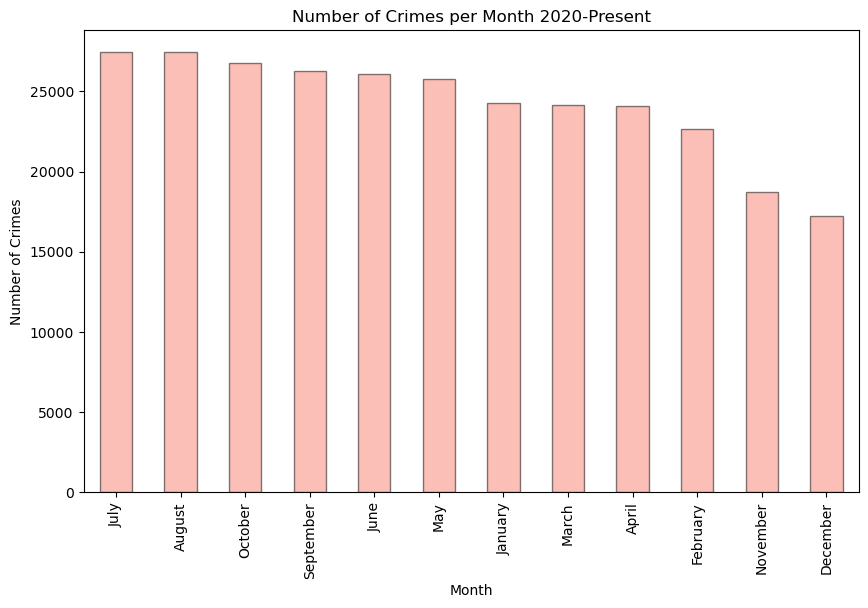

In [ ]:
df_nonan['Month'].value_counts().plot(kind='bar', color='salmon', ylabel='Number of Crimes', title='Number of Crimes per Month 2020-Present', alpha=0.5, figsize=(10, 6), edgecolor = 'black')


<Axes: title={'center': 'Number of Crimes per Month in 2020'}, xlabel='Month', ylabel='Number of Crimes'>

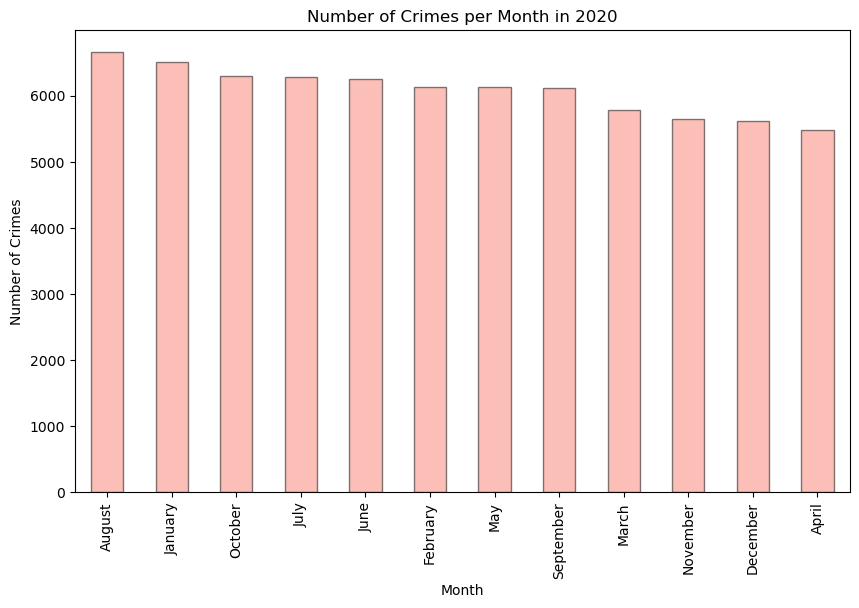

In [ ]:
year_2020['Month'].value_counts().plot(kind='bar', color='salmon', ylabel='Number of Crimes', title='Number of Crimes per Month in 2020', alpha=0.5, figsize=(10, 6), edgecolor = 'black')

<Axes: title={'center': 'Number of Crimes per Month in 2021'}, xlabel='Month', ylabel='Number of Crimes'>

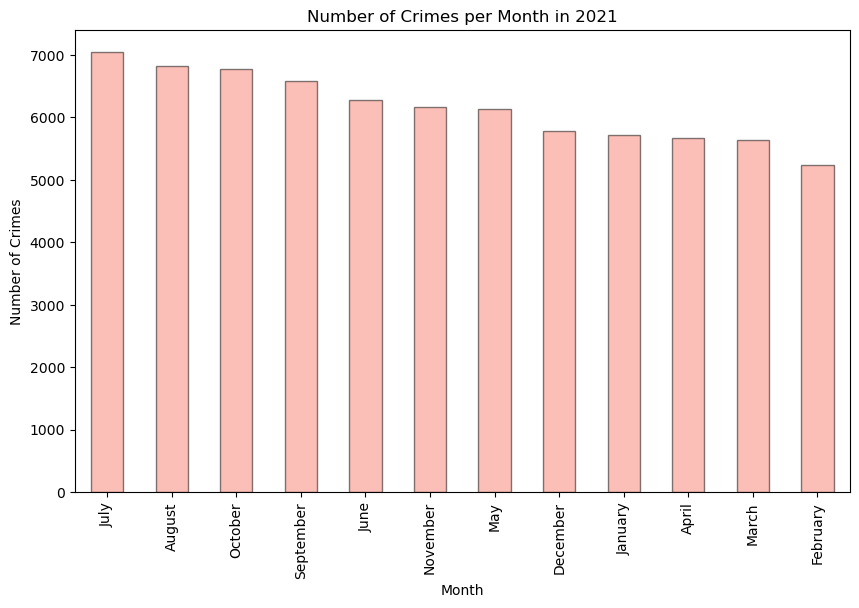

In [ ]:
year_2021['Month'].value_counts().plot(kind='bar', color='salmon', ylabel='Number of Crimes', title='Number of Crimes per Month in 2021', alpha=0.5, figsize=(10, 6), edgecolor = 'black')

<Axes: title={'center': 'Number of Crimes per Month in 2022'}, xlabel='Month', ylabel='Number of Crimes'>

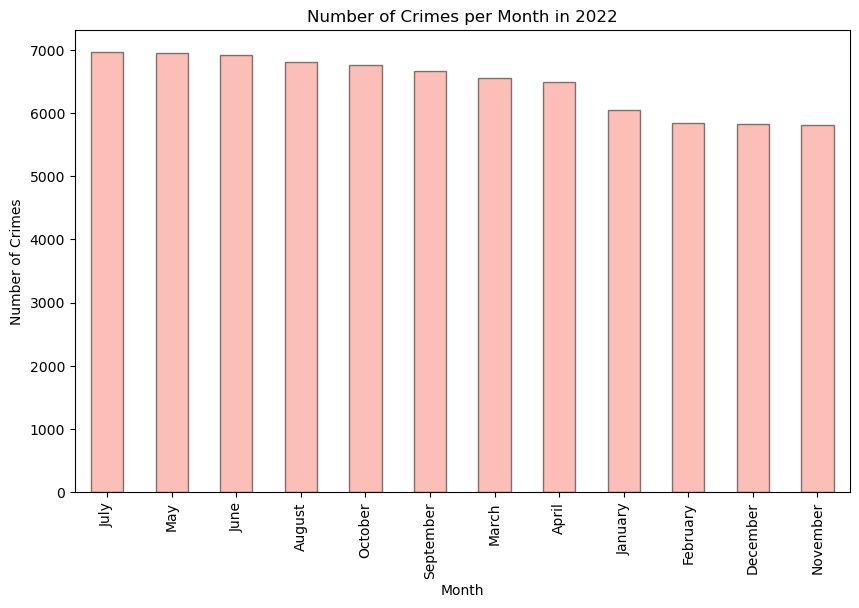

In [ ]:
year_2022['Month'].value_counts().plot(kind='bar', color='salmon', ylabel='Number of Crimes', title='Number of Crimes per Month in 2022', alpha=0.5, figsize=(10, 6), edgecolor = 'black')

<Axes: title={'center': 'Number of Crimes per Month 2023'}, xlabel='Month', ylabel='Number of Crimes'>

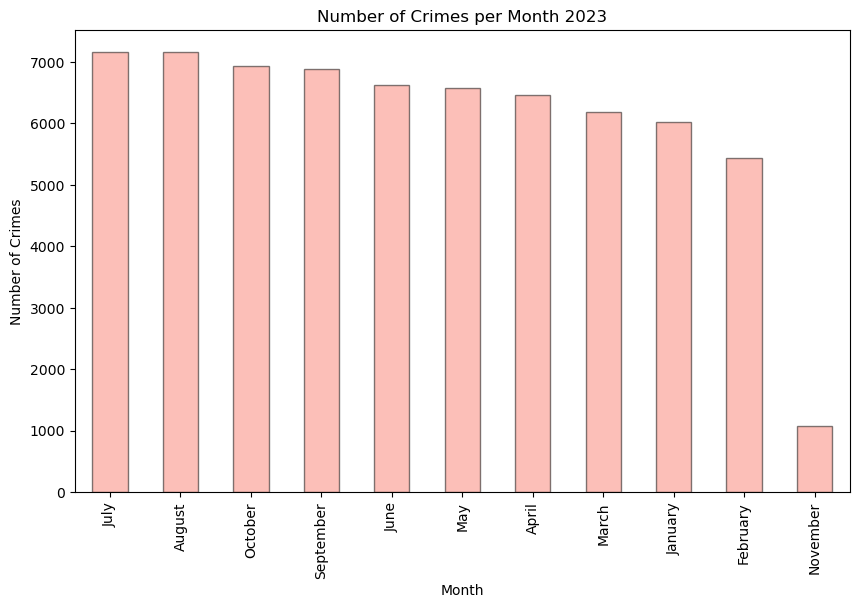

In [ ]:
year_2023['Month'].value_counts().plot(kind='bar', color='salmon', ylabel='Number of Crimes', title='Number of Crimes per Month 2023', alpha=0.5, figsize=(10, 6), edgecolor = 'black')

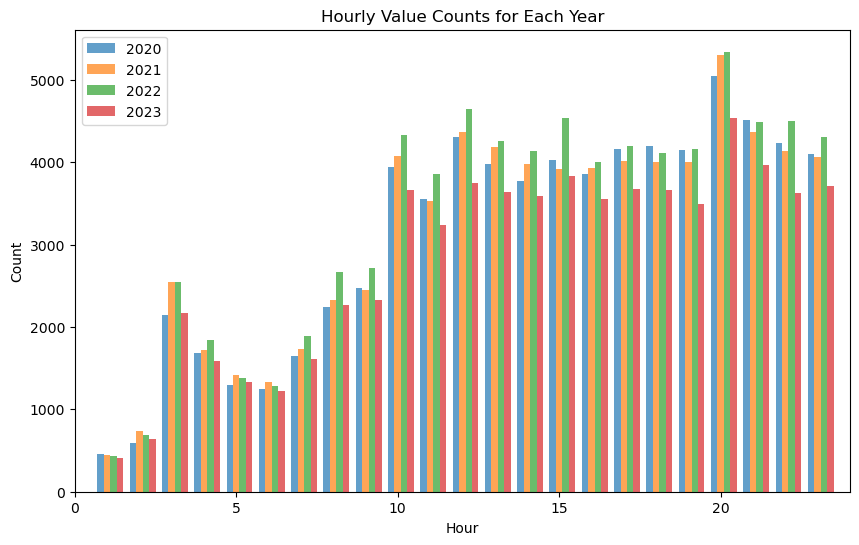

In [ ]:


# Assuming you have DataFrames year_2020, year_2021, year_2022, and year_2023
# with a column 'Hour' containing the hour data

# Extract hour counts for each year
hour_counts_2020 = year_2020['Hour'].value_counts()
hour_counts_2021 = year_2021['Hour'].value_counts()
hour_counts_2022 = year_2022['Hour'].value_counts()
hour_counts_2023 = year_2023['Hour'].value_counts()

# Set the width of each bar
bar_width = 0.2

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot
plt.bar(hour_counts_2020.index - bar_width, hour_counts_2020, width=bar_width, label='2020', alpha=0.7)
plt.bar(hour_counts_2021.index, hour_counts_2021, width=bar_width, label='2021', alpha=0.7)
plt.bar(hour_counts_2022.index + bar_width, hour_counts_2022, width=bar_width, label='2022', alpha=0.7)
plt.bar(hour_counts_2023.index + 2 * bar_width, hour_counts_2023, width=bar_width, label='2023', alpha=0.7)

# Add labels and title
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Hourly Value Counts for Each Year')

# Set x-axis limits
plt.xlim(0, 24)

# Add legend
plt.legend()

# Show the plot
plt.show()


<Axes: title={'center': 'Number of Crimes per Hour in 2020'}, xlabel='Hour', ylabel='Number of Crimes'>

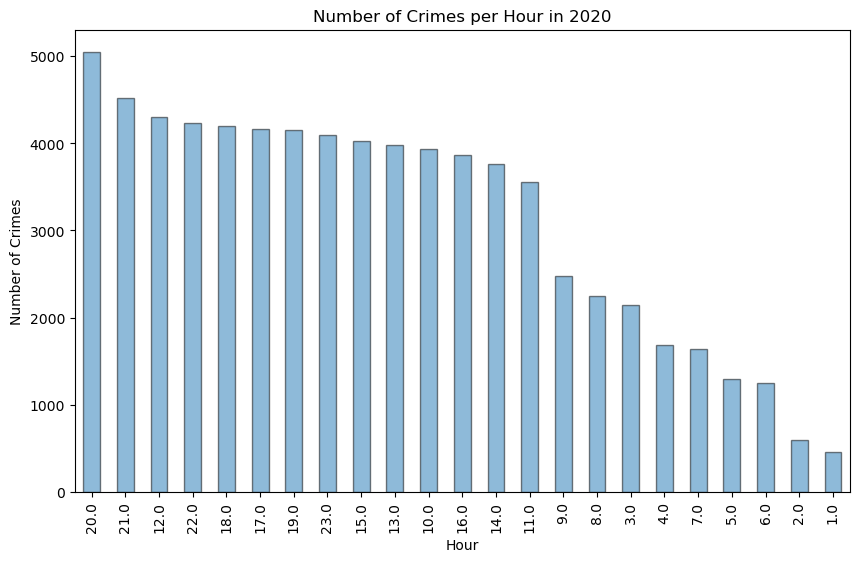

In [ ]:
year_2020['Hour'].value_counts().plot(kind='bar',alpha=0.5,figsize=(10, 6),edgecolor = 'black', ylabel='Number of Crimes', title='Number of Crimes per Hour in 2020')

<Axes: title={'center': 'Number of Crimes per Hour in 2021'}, xlabel='Hour', ylabel='Number of Crimes'>

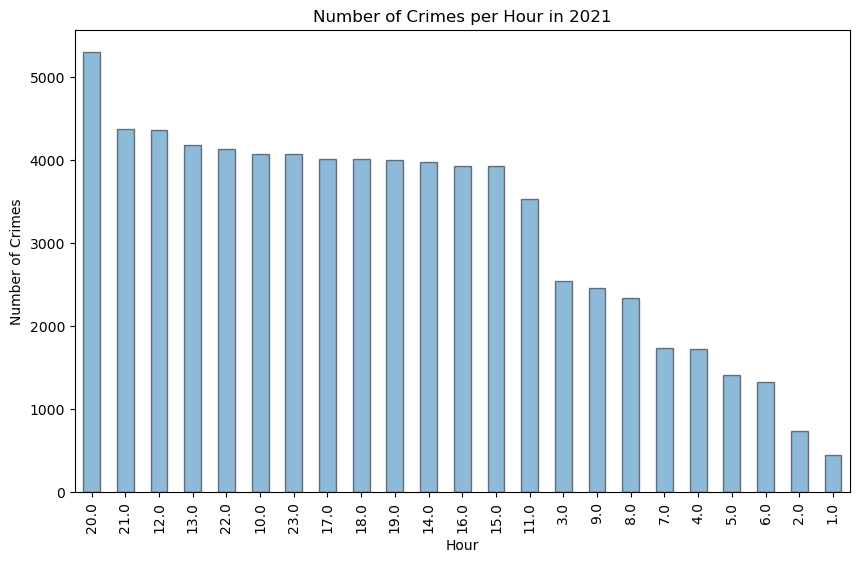

In [ ]:
year_2021['Hour'].value_counts().plot(kind='bar',alpha=0.5,figsize=(10, 6),edgecolor = 'black', ylabel='Number of Crimes', title='Number of Crimes per Hour in 2021')

<Axes: title={'center': 'Number of Crimes per Hour in 2022'}, xlabel='Hour', ylabel='Number of Crimes'>

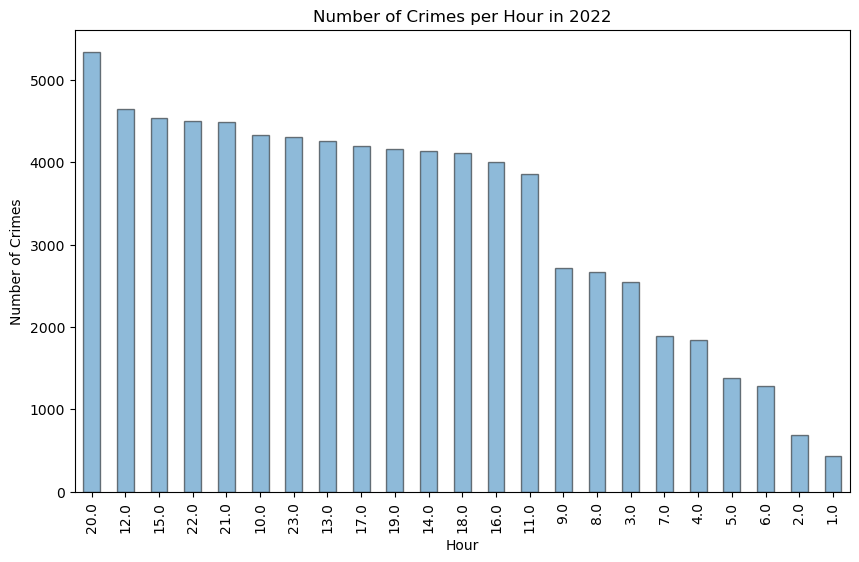

In [ ]:
year_2022['Hour'].value_counts().plot(kind='bar',alpha=0.5,figsize=(10, 6),edgecolor = 'black', ylabel='Number of Crimes', title='Number of Crimes per Hour in 2022')

<Axes: title={'center': 'Number of Crimes per Hour in 2023'}, xlabel='Hour', ylabel='Number of Crimes'>

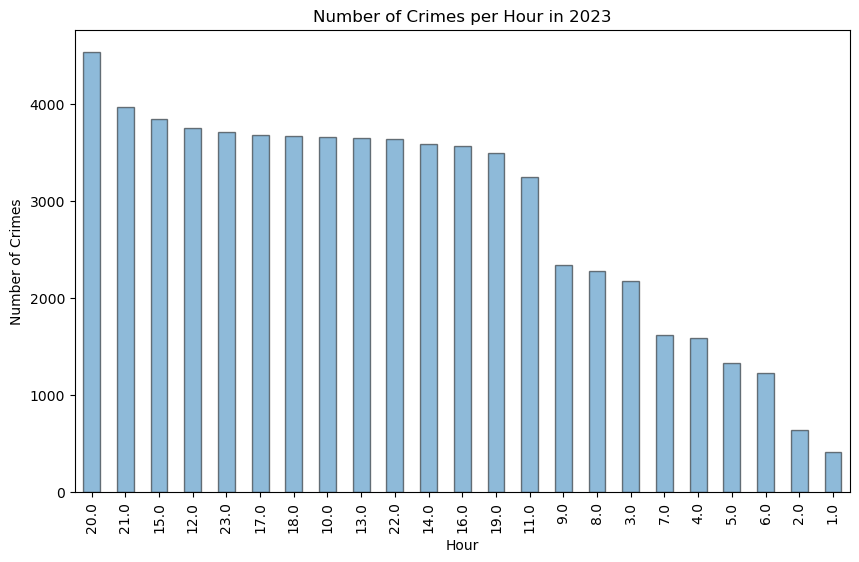

In [ ]:
year_2023['Hour'].value_counts().plot(kind='bar',alpha=0.5,figsize=(10, 6),edgecolor = 'black', ylabel='Number of Crimes', title='Number of Crimes per Hour in 2023')

<Axes: title={'center': 'Number of Crimes per Hour 2020-Present'}, xlabel='Hour', ylabel='Number of Crimes'>

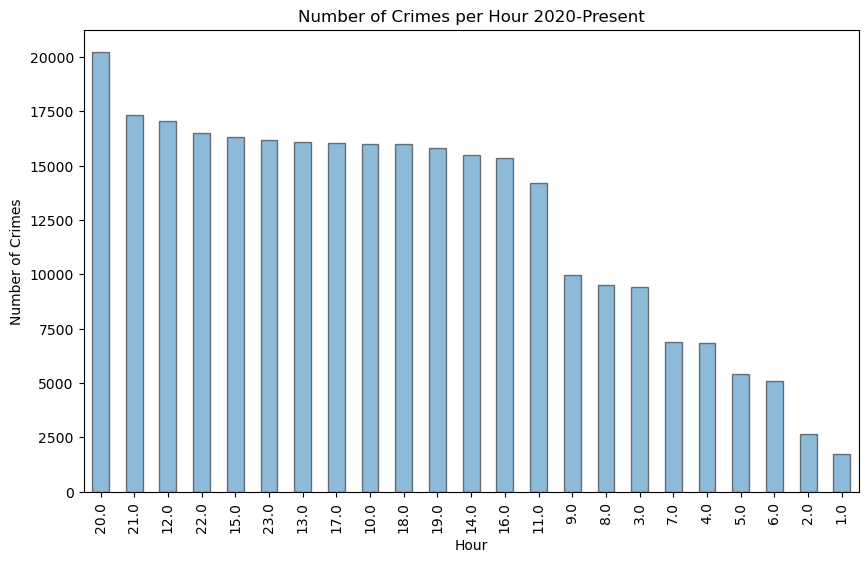

In [ ]:
df_nonan['Hour'].value_counts().plot(kind='bar',alpha=0.5,figsize=(10, 6),edgecolor = 'black', ylabel='Number of Crimes', title='Number of Crimes per Hour 2020-Present')

In [ ]:
df_nonan['Date of Crime'].dt.year

0         2020
1         2020
5         2020
10        2020
11        2020
          ... 
834303    2023
834306    2023
834309    2023
834316    2023
834317    2023
Name: Date of Crime, Length: 290925, dtype: int32

In [ ]:
filtered_df = df_nonan[df_nonan.groupby('Weapon Used')['Weapon Used'].transform('count') ==1 ]
filtered_df['Weapon Used'].value_counts()

Weapon Used
M1-1 SEMIAUTOMATIC ASSAULT RIFLE                 1
HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE    1
M-14 SEMIAUTOMATIC ASSAULT RIFLE                 1
Name: count, dtype: int64

In [ ]:
crimeplases = df_nonan[df_nonan.groupby('Type of Crime')['Type of Crime'].transform('count') ==1 ]
crimeplases['Type of Crime'].value_counts()

Type of Crime
SEX OFFENDER REGISTRANT OUT OF COMPLIANCE       1
THEFT, COIN MACHINE - GRAND ($950.01 & OVER)    1
EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)        1
THEFT, COIN MACHINE - ATTEMPT                   1
TILL TAP - PETTY ($950 & UNDER)                 1
CHILD ABANDONMENT                               1
CREDIT CARDS, FRAUD USE ($950 & UNDER           1
DRIVING WITHOUT OWNER CONSENT (DWOC)            1
COUNTERFEIT                                     1
CONTRIBUTING                                    1
DRUNK ROLL                                      1
DISHONEST EMPLOYEE - PETTY THEFT                1
Name: count, dtype: int64

In [ ]:
df_nonan['Month'].value_counts()

Month
July         27460
August       27452
October      26781
September    26248
June         26074
May          25793
January      24289
March        24165
April        24107
February     22644
November     18699
December     17213
Name: count, dtype: int64

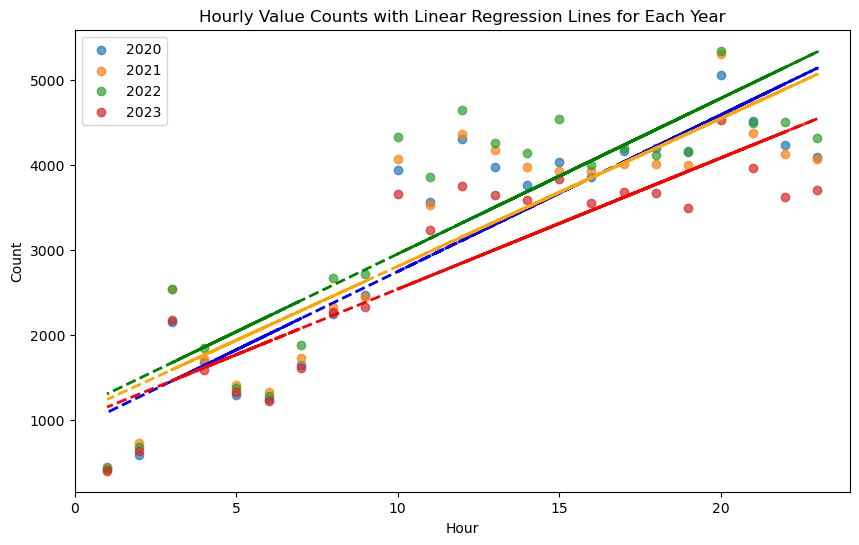

In [ ]:


# with a column 'Hour' containing the hour data

# Extract hour counts for each year
hour_counts_2020 = year_2020['Hour'].value_counts()
hour_counts_2021 = year_2021['Hour'].value_counts()
hour_counts_2022 = year_2022['Hour'].value_counts()
hour_counts_2023 = year_2023['Hour'].value_counts()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a scatter plot
plt.scatter(hour_counts_2020.index, hour_counts_2020, label='2020', alpha=0.7)
plt.scatter(hour_counts_2021.index, hour_counts_2021, label='2021', alpha=0.7)
plt.scatter(hour_counts_2022.index, hour_counts_2022, label='2022', alpha=0.7)
plt.scatter(hour_counts_2023.index, hour_counts_2023, label='2023', alpha=0.7)

# Perform linear regression and plot regression lines
regression_2020 = np.polyfit(hour_counts_2020.index, hour_counts_2020, 1)
regression_line_2020 = np.polyval(regression_2020, hour_counts_2020.index)
plt.plot(hour_counts_2020.index, regression_line_2020, color='blue', linestyle='dashed', linewidth=2)

regression_2021 = np.polyfit(hour_counts_2021.index, hour_counts_2021, 1)
regression_line_2021 = np.polyval(regression_2021, hour_counts_2021.index)
plt.plot(hour_counts_2021.index, regression_line_2021, color='orange', linestyle='dashed', linewidth=2)

regression_2022 = np.polyfit(hour_counts_2022.index, hour_counts_2022, 1)
regression_line_2022 = np.polyval(regression_2022, hour_counts_2022.index)
plt.plot(hour_counts_2022.index, regression_line_2022, color='green', linestyle='dashed', linewidth=2)

regression_2023 = np.polyfit(hour_counts_2023.index, hour_counts_2023, 1)
regression_line_2023 = np.polyval(regression_2023, hour_counts_2023.index)
plt.plot(hour_counts_2023.index, regression_line_2023, color='red', linestyle='dashed', linewidth=2)

# Add labels and title
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Hourly Value Counts with Linear Regression Lines for Each Year')

# Set x-axis limits
plt.xlim(0, 24)

# Add legend
plt.legend()

# Show the plot
plt.show()
